# Regression With Bosting Housing Market


1. [Overview](#1)
1. [Importing Libraries and Reading the Dataset](#2)
1. [Data Analysis](#3) 
    * [Data Preprocessing](#4) 
    * [Visualizing Data](#5) 
1. [Regression Models](#6) 
    * [Linear Regression](#7) 
    * [Polynomial Regression - 2nd degree](#8)
    * [Ridge Regression](#9)
    * [Lasso Regression](#10)
    * [Support Vector Regression](#11)
    * [Decision Tree Regression](#12) 
    * [Random Forest Regression](#13)
1. [Measuring the Error](#14)
    * [Visualizing Models Performance](#15)


## <span id="1"></span>  1. Overview

Columns:
- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq. ft
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS :** Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric oxide concentration (parts per 10 million)
- **RM:** Average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built prior to 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **PTRATIO:** Pupil-teacher ratio by town
- **B:** 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- **LSTAT:** Percentage of lower status of the population
- **MEDV:** Median value of owner-occupied homes in $1000s

## <span id="2"></span> 2. Importing Libraries and Reading the Dataset 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


As you seen, there isn't "MEDV" column that we will try to predict. Let's add the column to our dataset.

In [ ]:
dataset['MEDV'] = boston_dataset.target

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Pandas and Numpy review

#### Converting a dataframe to numpy array.

In [ ]:
d = {'col1': [1, 2], 'col2': [3, 4], 'col3': [9, 8], 'col4': [1, 0]}
df = pd.DataFrame(data=d)
df

,col1,col2,col3,col4
0,1,3,9,1
1,2,4,8,0


In [ ]:
np_array1=df.iloc[:,0:3].values
np_array1

array([[1, 3, 9],
       [2, 4, 8]])

In [ ]:
np_array1.shape

(2, 3)

In [ ]:
np_array2=df.iloc[:,3].values
np_array2

array([1, 0])

In [ ]:
np_array2.shape

(2,)

In [ ]:
np_array2=np_array2.reshape(-1,1)
np_array2

array([[1],
       [0]])

In [ ]:
np_array2.shape

(2, 1)

## <span id="3"></span> 3. Data Analysis

### <span id="4"></span> Data Preprocessing

### Exercise -1: Check if there is any missing values.

In [ ]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

###  Exercise-2: Divide the Dataset columns into X and y as below:

**1. X will contain the first 13 columns as a numpy array**

**2. y will contain only the last column again as an array**

**3. Check the shape of both the array and change shape of y to make it same as the shape of X**

For the model to work shape of X and y should be same.

Hint: a) Use dataset.iloc[row,column].values syntax. b) use the reshape(n,n) to change the shape of y


In [ ]:
X=dataset.iloc[:,0:13].values
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
X.shape

(506, 13)

In [ ]:
y=dataset.iloc[:,13].values.reshape(-1,1)

In [ ]:
y.shape

(506, 1)

In [ ]:
type(y)

numpy.ndarray

### Split data

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)


In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354, 1)
Shape of y_test (152, 1)


### <span id="5"></span> Visualizing Data

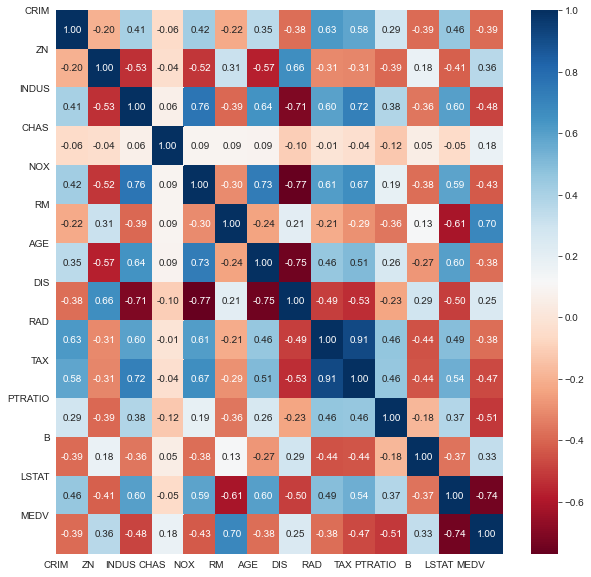

In [ ]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

## <span id="6"></span> 4. Regression Models

### <span id="7"></span> Linear Regression

In [ ]:
# Train the model using Linear Regression
# Here we are creating a Linear regression model

from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

# Estimatingt the Cross Validation Score
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)
cv_linear

array([0.70126146, 0.80890564, 0.73921242, 0.72282719, 0.81675479,
       0.46358474, 0.76652097, 0.49539638, 0.75589085, 0.71450003])

In [ ]:
# Predicting R2 Score for the Train set
from sklearn.metrics import r2_score
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
r2_score_linear_train

0.7435787589010061

 ### Exercise-3 : Estimate R2 score from the Test dataset

In [ ]:
# Estimating R2 Score from the Test set

y_pred_linear_test=regressor_linear.predict(X_test)
r2_score_linear_test=r2_score(y_test,y_pred_linear_test)
r2_score_linear_test

0.7133593313710349

In [ ]:
# Calculating RMSE from the Test set results
from sklearn.metrics import mean_squared_error
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
rmse_linear

4.647279745724213

 ### Exercise-4 : Take the mean of CV and print all the metrics in the following format. 
 
 `Mean of CV (Cross-validation-score):  0.6984854476156042
 R2_score (train):  0.7435787589010061
 R2_score (test):  0.7133593313710349
 RMSE:  4.647279745724213`


In [ ]:
print("Mean of CV: ",cv_linear.mean() )

Mean of CV:  0.6984854476156042


### <span id="8"></span> Polynomial Regression - 2nd degree

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.6984854476156042
R2_score (train):  0.9306558486360267
R2_score (test):  0.7665134365149451
RMSE:  4.194313211006324


### <span id="9"></span> Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

In [ ]:

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.7635629962138679
R2_score (train):  0.9228176586388414
R2_score (test):  0.891965455298589
RMSE:  2.8530621664437565


### <span id="10"></span> Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [ ]:
# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.7505443182491558
R2_score (train):  0.9234017201921203
R2_score (test):  0.8950938075525039
RMSE:  2.8114507112289018


### <span id="11"></span> Support Vector Regression

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [ ]:
# Fitting the SVR Model to the dataset
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR()

In [ ]:
# Predicting Cross Validation Score
cv_svr = cross_val_score(estimator = regressor_svr, X = X_scaled, y = y_scaled.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score the Test set results
y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE the Test set results
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  0.782600693247584
R2_score (train):  0.8742715669147498
R2_score (test):  0.8044070157723574
RMSE:  3.8388977809328355


### <span id="12"></span> Decision Tree Regression

### Excercise 5
Create a decision tree regression model and print the cross validation score (CV), R2_score for training and test data and the root mean squared error (RMSE).

Hint:
 1. Then pass the training dataset to the algorithm to train it. We use the **.fit()** method
 2. Then pass the testing data to the trained algorithm to predict the outcome. We use the **.predict()** method.
 3.DecisionTreeRegressor is available at sklearn.tree module
 
`   from sklearn.tree import DecisionTreeRegressor
 regressor_dt = DecisionTreeRegressor(random_state = 0)`


 #### Exercise-5a :  Create or train the model using the training data

In [ ]:
# Fitting the Decision Tree Regression Model to the dataset


 #### Exercise-5b : Print the scores from the 10-fold cross validated models

 #### Exercise-5c : Estimate R2 score from the training dataset

In [ ]:
# Predicting R2 Score the Train set results


 #### Exercise-5d : Estimate R2 score from the test dataset

In [ ]:
# Predicting R2 Score the Test set results


In [ ]:
# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV of Decision Tree (DT) Model: ', cv_dt.mean())
print('DT R2_score (train): ', r2_score_dt_train)
print('DT R2_score (test): ', r2_score_dt_test)
print("DT RMSE: ", rmse_dt)

NameError: name 'y_pred_dt_test' is not defined

#### Quiz
**Based on the following data, this decision tree model overfit the data?**

`CV of Decision Tree (DT) Model:  0.6177422304890111
DT R2_score (train):  1.0
DT R2_score (test):  0.5989917396644069
DT RMSE:  5.496757417356451`

a) Yes

b) No

### <span id="13"></span> Random Forest Regression 

In [ ]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8182118617652808
R2_score (train):  0.9768407108850092
R2_score (test):  0.8637486208767902
RMSE:  3.204057971213175


In [ ]:
X_test[1]

array([5.69175e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.83000e-01,
       6.11400e+00, 7.98000e+01, 3.54590e+00, 2.40000e+01, 6.66000e+02,
       2.02000e+01, 3.92680e+02, 1.49800e+01])

In [ ]:
y_pred_rf_test1=regressor_rf.predict(X_test[1:2])
y_pred_rf_test1

array([19.0692])

In [ ]:
a_home_pred=pd.DataFrame(X_test[1:2], columns = boston_dataset.feature_names)
a_home_pred

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,5.69175,0.0,18.1,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98


In [ ]:
a_home_pred['MEDV']=y_pred_rf_test1
a_home_pred

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,5.69175,0.0,18.1,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,19.0692


## <span id="14"></span> 5. Measuring the Error

In [ ]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

### <span id="15"></span> Visualizing Model Performance

In [ ]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

In [ ]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()